In [2]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from numpy import unique
from numpy import where
import seaborn as sns
from time import time
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/drive/MyDrive/projeler/Pokemon.csv')
data = data.sample(frac=1)
data = data.reset_index()
data = data.drop('index', axis=1)
print("Data Median: ", data.median())

Data Median:  #             364.5
Total         450.0
HP             65.0
Attack         75.0
Defense        70.0
Sp. Atk        65.0
Sp. Def        70.0
Speed          65.0
Generation      3.0
Legendary       0.0
dtype: float64


In [4]:
encoder = LabelEncoder()

labels = encoder.fit_transform(data.iloc[:,12])

In [5]:
data = data.drop('#', axis=1)
data = data.drop('Name', axis=1)
data = data.drop('Type 1', axis=1)
data = data.drop('Type 2', axis=1)
data = data.drop('Legendary', axis=1)

In [6]:
accuracy = []
X = data.iloc[:,:]
y = labels
X = np.array(X)
print("X shape: ", X.shape)

X shape:  (800, 8)


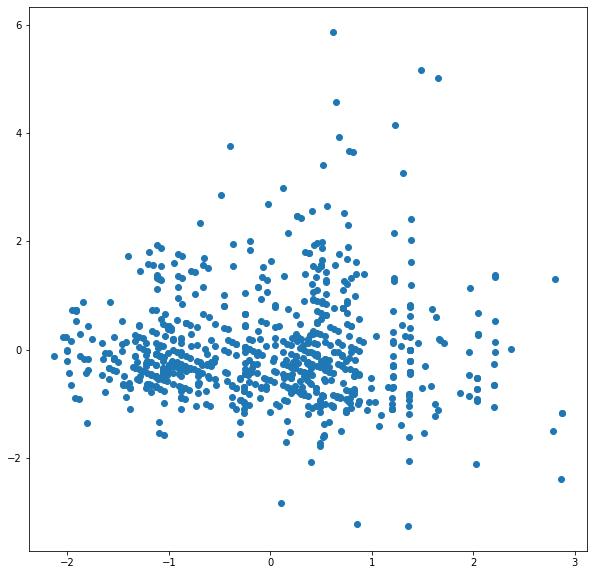

In [7]:
transformer = FactorAnalysis(n_components=2, random_state=0)
X_fa = transformer.fit_transform(X)

fig=plt.figure(figsize=(10, 10))
plt.scatter(X_fa[:,0], X_fa[:,1])
plt.show()

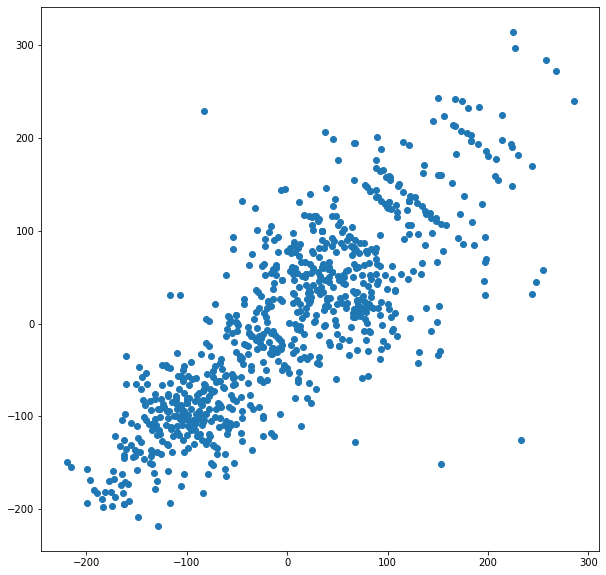

In [8]:
embedding = MDS(n_components=2)
X_mds = embedding.fit_transform(X)

fig=plt.figure(figsize=(10, 10))
plt.scatter(X_mds[:,0], X_mds[:,1])
plt.show()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)
x_train_fa, x_test_fa, y_train_fa, y_test_fa = train_test_split(X_fa, y, test_size=0.33, random_state=5)
x_train_mds, x_test_mds, y_train_mds, y_test_mds = train_test_split(X_mds, y, test_size=0.33, random_state=5)

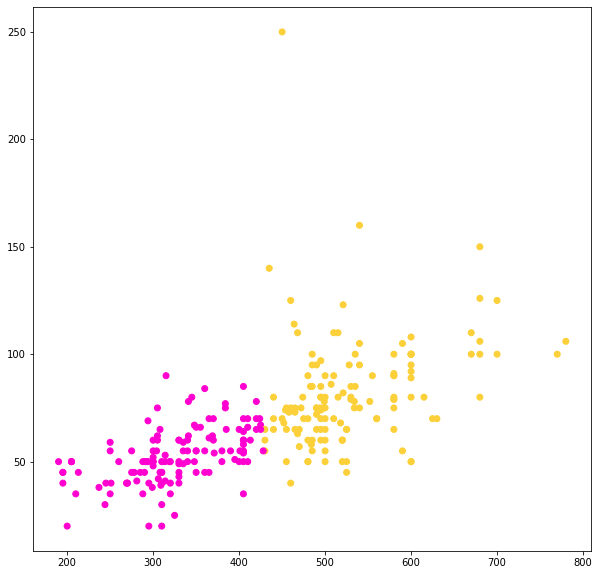

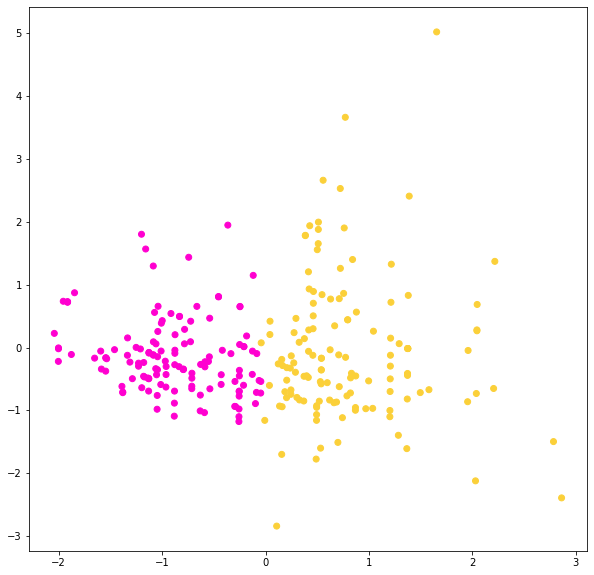

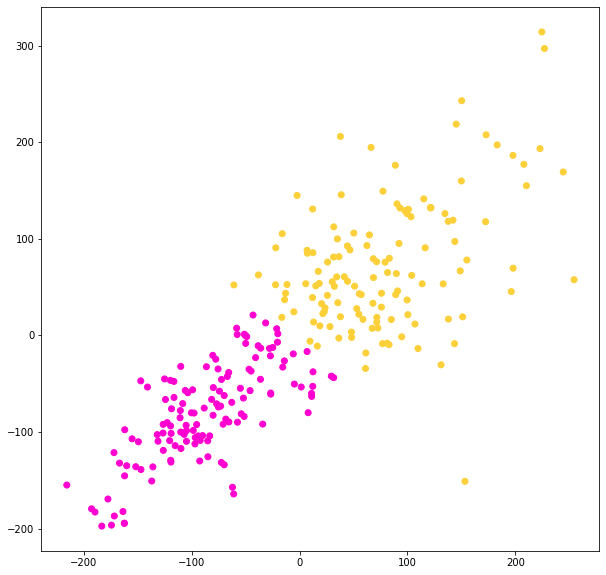

In [10]:
colors = np.array(['#ff00d0','#FBD039'])
                  # 0==pink  1==yellow 

km = KMeans(n_clusters=2)
cl = km.fit(x_train)
y_p = km.predict(x_test)

fig=plt.figure(figsize=(10, 10))
plt.scatter(x_test[:,0], x_test[:,1], c=colors[y_p])
plt.show()

a_k_1 = accuracy_score(y_test, y_p)

km1 = KMeans(n_clusters=2)
c_fa = km1.fit(x_train_fa)
y_p_fa = km1.predict(x_test_fa)

fig=plt.figure(figsize=(10, 10))
plt.scatter(x_test_fa[:,0], x_test_fa[:,1], c=colors[y_p_fa])
plt.show()

a_k_2 = accuracy_score(y_test_fa, y_p_fa)

km2 = KMeans(n_clusters=2)
c_mds = km2.fit(x_train_mds)
y_p_mds = km2.predict(x_test_mds)

fig=plt.figure(figsize=(10, 10))
plt.scatter(x_test_mds[:,0], x_test_mds[:,1], c=colors[y_p_mds])
plt.show()

a_k_3 = accuracy_score(y_test_mds, y_p_mds)

accuracy.append([a_k_1, a_k_2, a_k_3])

In [11]:
model1 = Sequential()
model1.add(Dense(255, input_dim=8))
model1.add(Activation("relu"))
model1.add(Dense(1))
model1.add(Activation("sigmoid"))

model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model1.fit(x_train, y_train, batch_size=64, epochs=250, validation_split=0.2)

a_m_1 = model1.evaluate(x=x_test, y=y_test, batch_size=64)[1]

Epoch 1/250
7/7 [==============================] - 0s 24ms/step - loss: 98.8223 - accuracy: 0.6869 - val_loss: 82.7633 - val_accuracy: 0.1019
Epoch 2/250
7/7 [==============================] - 0s 6ms/step - loss: 63.4692 - accuracy: 0.5911 - val_loss: 54.7871 - val_accuracy: 0.8981
Epoch 3/250
7/7 [==============================] - 0s 4ms/step - loss: 3.1758 - accuracy: 0.7967 - val_loss: 0.5934 - val_accuracy: 0.8981
Epoch 4/250
7/7 [==============================] - 0s 4ms/step - loss: 0.5800 - accuracy: 0.9299 - val_loss: 0.5065 - val_accuracy: 0.8981
Epoch 5/250
7/7 [==============================] - 0s 4ms/step - loss: 0.3896 - accuracy: 0.9299 - val_loss: 0.5351 - val_accuracy: 0.8981
Epoch 6/250
7/7 [==============================] - 0s 4ms/step - loss: 0.3825 - accuracy: 0.9299 - val_loss: 0.4474 - val_accuracy: 0.8981
Epoch 7/250
7/7 [==============================] - 0s 4ms/step - loss: 0.3345 - accuracy: 0.9299 - val_loss: 0.5370 - val_accuracy: 0.8981
Epoch 8/250
7/7 [=====

In [12]:
model2 = Sequential()
model2.add(Dense(255, input_dim=2))
model2.add(Activation("relu"))
model2.add(Dense(1))
model2.add(Activation("sigmoid"))

model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model2.fit(x_train_fa, y_train_fa, batch_size=64, epochs=250, validation_split=0.2)

a_m_2 = model2.evaluate(x=x_test_fa, y=y_test_fa, batch_size=64)[1]

Epoch 1/250
7/7 [==============================] - 0s 19ms/step - loss: 0.6734 - accuracy: 0.5911 - val_loss: 0.6564 - val_accuracy: 0.8611
Epoch 2/250
7/7 [==============================] - 0s 3ms/step - loss: 0.6464 - accuracy: 0.9042 - val_loss: 0.6326 - val_accuracy: 0.9074
Epoch 3/250
7/7 [==============================] - 0s 4ms/step - loss: 0.6217 - accuracy: 0.9299 - val_loss: 0.6109 - val_accuracy: 0.8981
Epoch 4/250
7/7 [==============================] - 0s 4ms/step - loss: 0.5990 - accuracy: 0.9299 - val_loss: 0.5909 - val_accuracy: 0.8981
Epoch 5/250
7/7 [==============================] - 0s 3ms/step - loss: 0.5781 - accuracy: 0.9299 - val_loss: 0.5723 - val_accuracy: 0.8981
Epoch 6/250
7/7 [==============================] - 0s 4ms/step - loss: 0.5586 - accuracy: 0.9299 - val_loss: 0.5553 - val_accuracy: 0.8981
Epoch 7/250
7/7 [==============================] - 0s 5ms/step - loss: 0.5406 - accuracy: 0.9299 - val_loss: 0.5396 - val_accuracy: 0.8981
Epoch 8/250
7/7 [=========

In [13]:
model3 = Sequential()
model3.add(Dense(255, input_dim=2))
model3.add(Activation("relu"))
model3.add(Dense(1))
model3.add(Activation("sigmoid"))

model3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model3.fit(x_train_mds, y_train_mds, batch_size=64, epochs=250, validation_split=0.2)

a_m_3 = model3.evaluate(x=x_test_mds, y=y_test_mds, batch_size=64)[1]

accuracy.append([a_m_1, a_m_2, a_m_3])

Epoch 1/250
7/7 [==============================] - 0s 18ms/step - loss: 4.7285 - accuracy: 0.7734 - val_loss: 7.8926 - val_accuracy: 0.8981
Epoch 2/250
7/7 [==============================] - 0s 4ms/step - loss: 2.2355 - accuracy: 0.8785 - val_loss: 2.1196 - val_accuracy: 0.7407
Epoch 3/250
7/7 [==============================] - 0s 4ms/step - loss: 1.7518 - accuracy: 0.8528 - val_loss: 1.2431 - val_accuracy: 0.8981
Epoch 4/250
7/7 [==============================] - 0s 4ms/step - loss: 1.4566 - accuracy: 0.8598 - val_loss: 1.2957 - val_accuracy: 0.8056
Epoch 5/250
7/7 [==============================] - 0s 5ms/step - loss: 0.5039 - accuracy: 0.8972 - val_loss: 0.5324 - val_accuracy: 0.8611
Epoch 6/250
7/7 [==============================] - 0s 4ms/step - loss: 0.5545 - accuracy: 0.8785 - val_loss: 1.4591 - val_accuracy: 0.8981
Epoch 7/250
7/7 [==============================] - 0s 4ms/step - loss: 0.5067 - accuracy: 0.8879 - val_loss: 0.4649 - val_accuracy: 0.8611
Epoch 8/250
7/7 [=========

In [14]:


lgc = LogisticRegression(penalty='l2').fit(x_train, y_train)
y_pred = lgc.predict(x_test)

a_l_1 = accuracy_score(y_test, y_pred)

lgc1 = LogisticRegression(penalty='l2').fit(x_train_fa, y_train_fa)
y_p_fa = lgc1.predict(x_test_fa)

a_l_2 = accuracy_score(y_test_fa, y_p_fa)

lgc2 = LogisticRegression(penalty='l2').fit(x_train_mds, y_train_mds)
y_p_mds = lgc2.predict(x_test_mds)

a_l_3 = accuracy_score(y_test_mds, y_p_mds)

accuracy.append([a_l_1, a_l_2, a_l_3])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
accuracy = np.array(accuracy)
df = pd.DataFrame(data=accuracy, index=["K-Means:", "Neural Networks:", "Logistic Regression:"], columns=["Orjinal", "Factoriel Analiz", "Çok B. Analiz"])
print("Doğruluk Tablosu:")
print(df)

Doğruluk Tablosu:
                       Orjinal  Factoriel Analiz  Çok B. Analiz
K-Means:              0.583333          0.590909       0.594697
Neural Networks:      0.909091          0.924242       0.931818
Logistic Regression:  0.946970          0.943182       0.939394
